# cleanup tide gauge data
    

In [1]:
import os
from glob import glob

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr
import hvplot.pandas  # noqa
import hvplot.xarray  # noqa

import pynsitu as pin

---

## load data

Data is downloaded from [datashom website](https://data.shom.fr).

Ideally data should be:

- Validées temps différé
- Netcdf4

But could be also raw differed.

In [2]:
## taos
root_dir = "/Users/aponte/Current_Projects/taos/campagnes/taos2/"

# taos2-drifters0
campaign="taos2_drifters0"
yaml = f"drifters0/{campaign}.yaml"

# taos2-drifters1
#campaign="taos2_drifters1"
#yaml = f"drifters1/{campaign}.yaml"

cp = pin.Campaign(os.path.join(root_dir,yaml))

In [4]:
# load ouistreham differed raw data

label = "tide_gauge_ouistreham"
file = os.path.join(cp["path_raw"], "tide_gauge_ouistreham_311_2023.nc")

ds = (xr.open_dataset(file)
      .rename(TIME="time", LONGITUDE="longitude", LATITUDE="latitude")
      .compute()
     )

for v in ds:
    if "Source" in v:
        ds = ds.rename(**{v:"sea_level"})

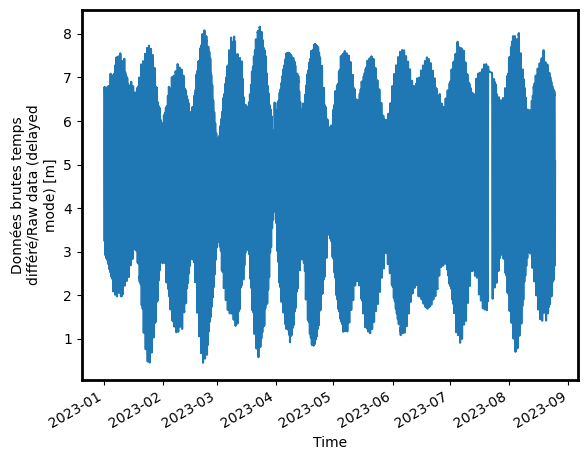

In [5]:
ds["sea_level"].plot()

In [6]:
# narrow down time
delta = pd.Timedelta("10D")
ds = ds.where( (ds.time>=cp["start"]-delta) & (ds.time<=cp["end"]+delta) , drop=True)

In [7]:
ds.sea_level.hvplot()

:Curve   [time]   (sea_level)

In [8]:
nc = os.path.join(cp["path_processed"], label+".nc")
ds.to_netcdf(nc, mode="w")

In [9]:
nc

'/Users/aponte/Current_projects/taos/campagnes/taos2/drifters0/datap/tide_gauge_ouistreham.nc'